In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import graphviz

In [ ]:
df = pd.read_csv("Book.csv")

In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [ ]:
df.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
9995,4.225100,2.678220,0.556858,1,0,0,1,0
9996,3.614858,0.431593,0.061778,1,0,0,1,0
9997,10.131863,10.262508,2.818090,1,0,0,1,0
9998,16.306236,0.014054,1.904495,1,0,0,1,0
9999,1.292596,0.415847,1.332285,0,1,0,1,0


In [ ]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [ ]:
df.notnull()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
9995,True,True,True,True,True,True,True,True
9996,True,True,True,True,True,True,True,True
9997,True,True,True,True,True,True,True,True
9998,True,True,True,True,True,True,True,True


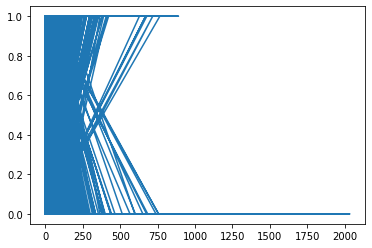

In [ ]:
x= df.distance_from_home
y=df.used_chip
plt.plot(x,y)

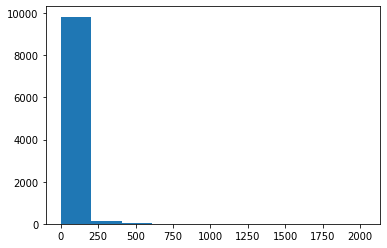

In [ ]:
plt.hist(x)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

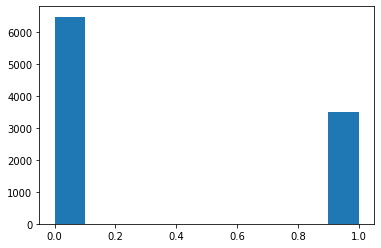

In [ ]:
plt.hist(y)
plt.show

<ipython-input-18-875e241d42ef>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(x,y)


<StemContainer object of 3 artists>

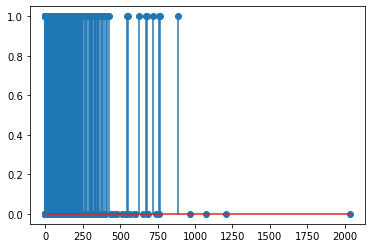

In [ ]:
a=df.used_pin_number
b= df.online_order
plt.stem(x,y)

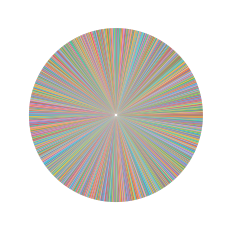

In [ ]:
plt.pie(a)
plt.show()

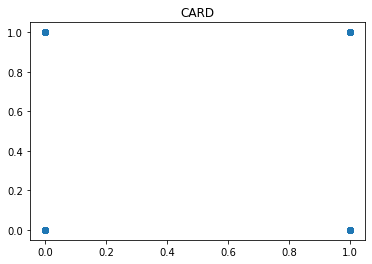

In [ ]:
plt.scatter(a,b)
plt.title("CARD")
plt.show()

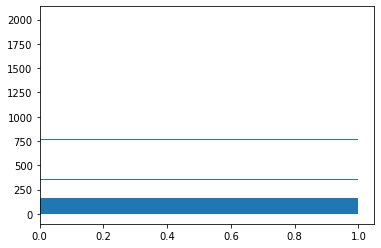

In [ ]:
plt.barh(x,y)
plt.show()

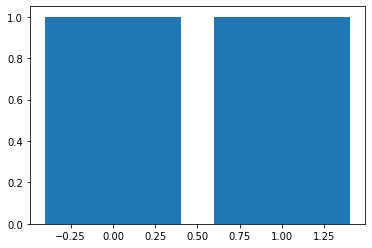

In [ ]:
plt.bar(a,y)
plt.show()

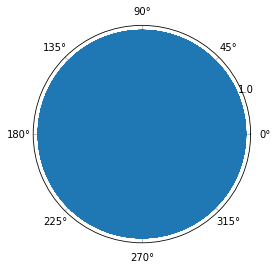

In [ ]:
plt.polar(b)
plt.show()

In [ ]:
X = df.drop('fraud', axis = 1)
Y = df['fraud']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

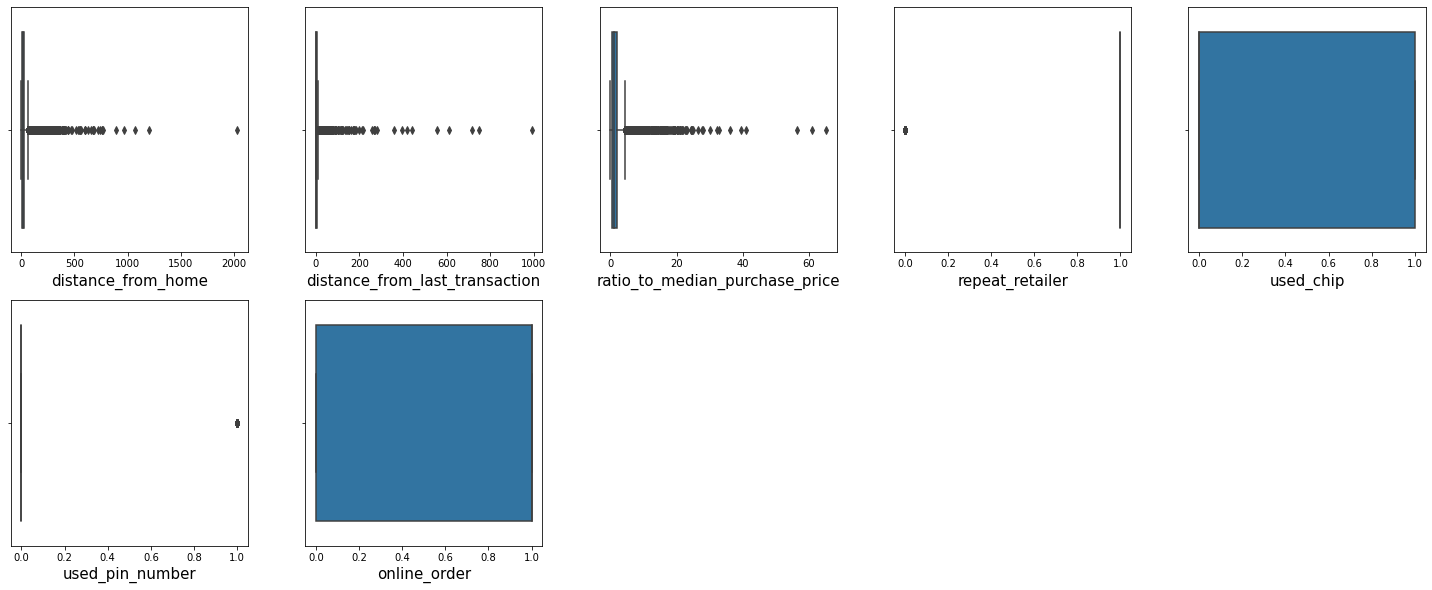

In [ ]:
plt.figure(figsize = (20,20))
plotnumber = 1

for col in X.columns:
  if plotnumber <=8:

    ax = plt.subplot(5,5, plotnumber)
    sns.boxplot(X[col])
    plt.xlabel(col, fontsize = 15)

  plotnumber += 1
plt.tight_layout()
plt.show()


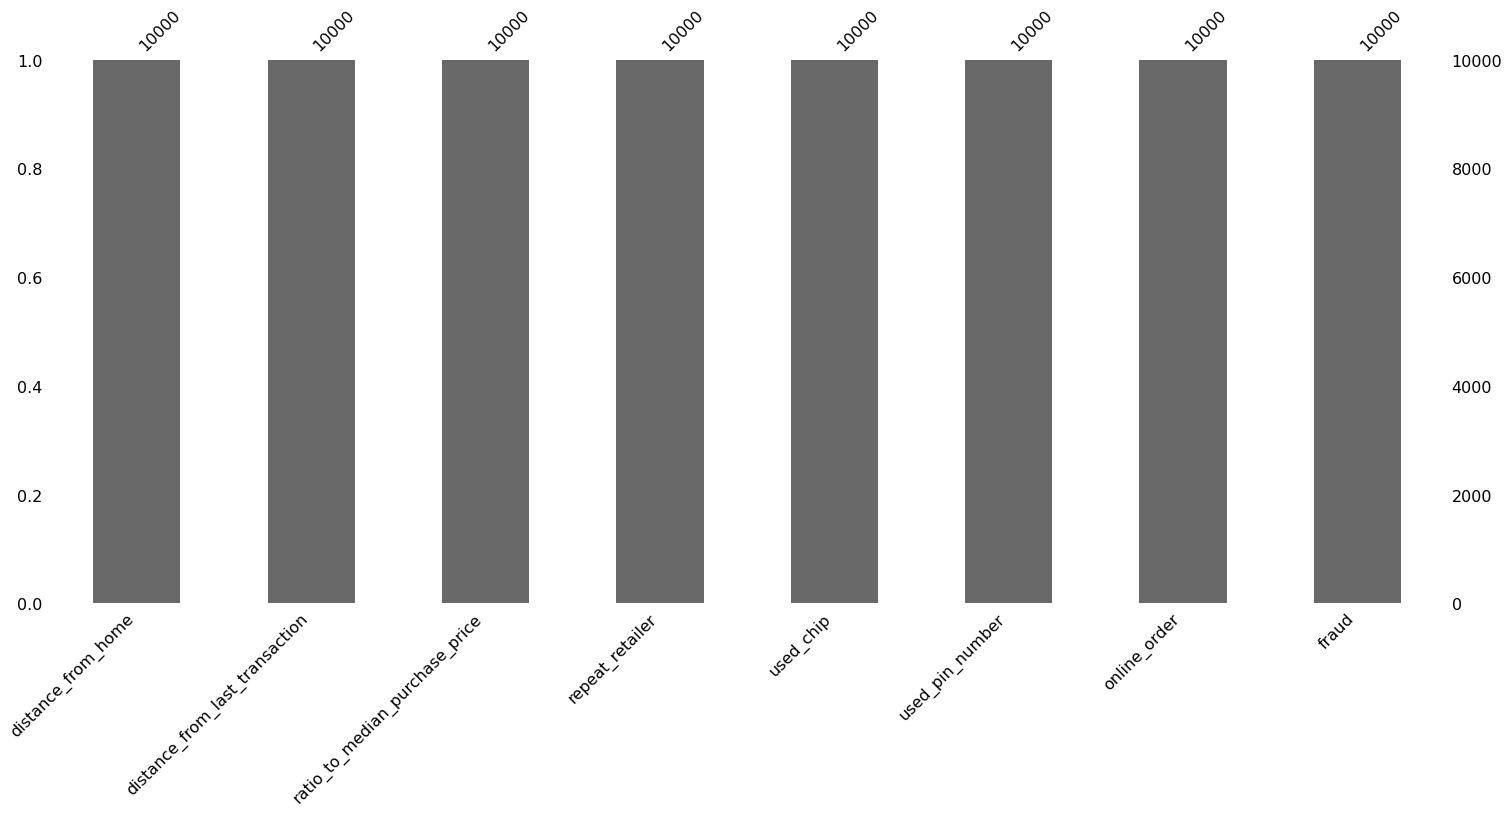

In [ ]:
import missingno as msno
msno.bar(df)
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.5, random_state = 0)

In [ ]:
a = StandardScaler()
X_train = a.fit_transform(X_train)
X_test = a.transform(X_test)

In [ ]:
#Algorithm.....
clf = DecisionTreeClassifier(criterion = "entropy",random_state=0)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
Y_pred = clf.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[4556,    3],
       [   8,  433]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,Y_pred)

0.9978

In [ ]:
accuracy = (cm[0][0] + cm[-1][-1])/np.sum(cm) 
print(accuracy)

0.9978


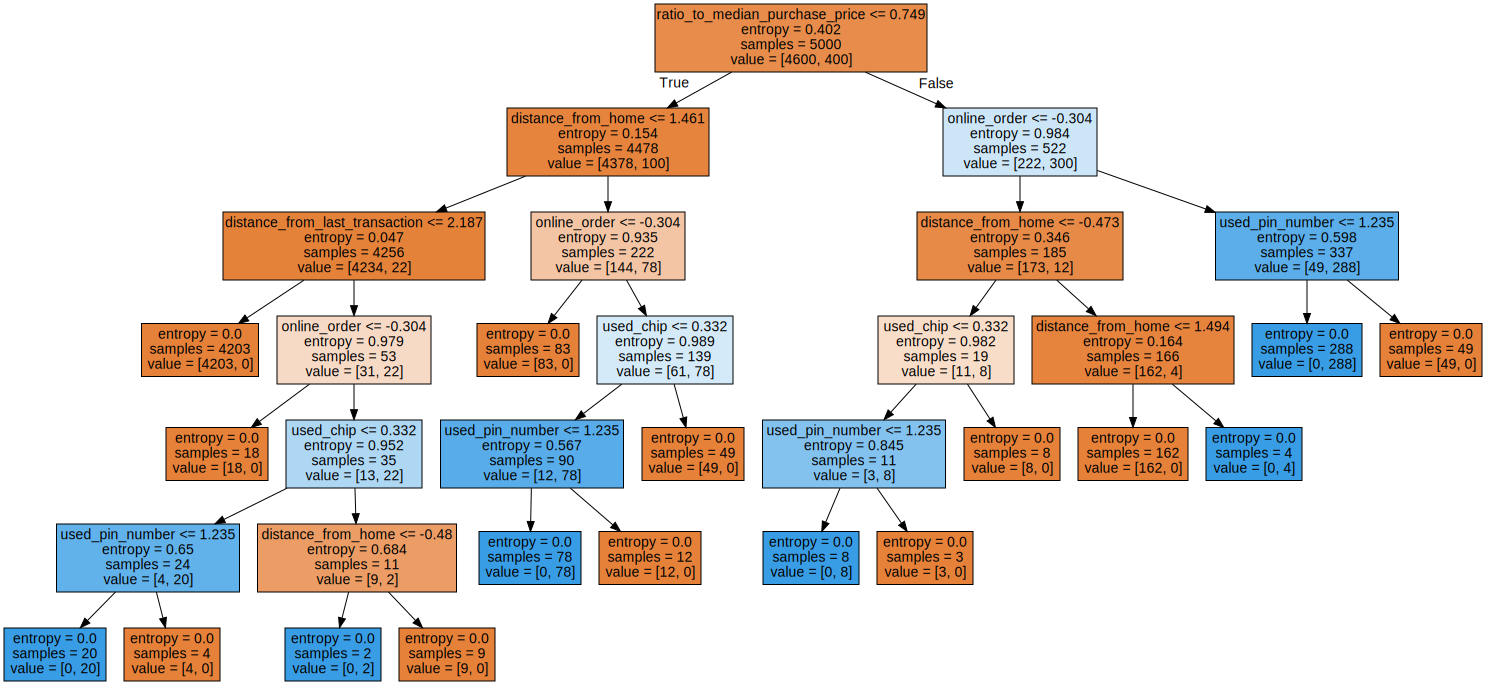

In [ ]:
graphviz.Source(export_graphviz(clf,feature_names=X.columns,filled=True))

In [ ]:
clf1 = GaussianNB()
clf1.fit(X_train, y_train)

GaussianNB()

In [ ]:
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[4556,    3],
       [   8,  433]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf1 = GaussianNB()
clf1.fit(X_train, y_train)
Y_pred = clf1.predict(X_test)
accuracy_score(y_test, y_pred)

0.6514